In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_25040\2436019669.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450

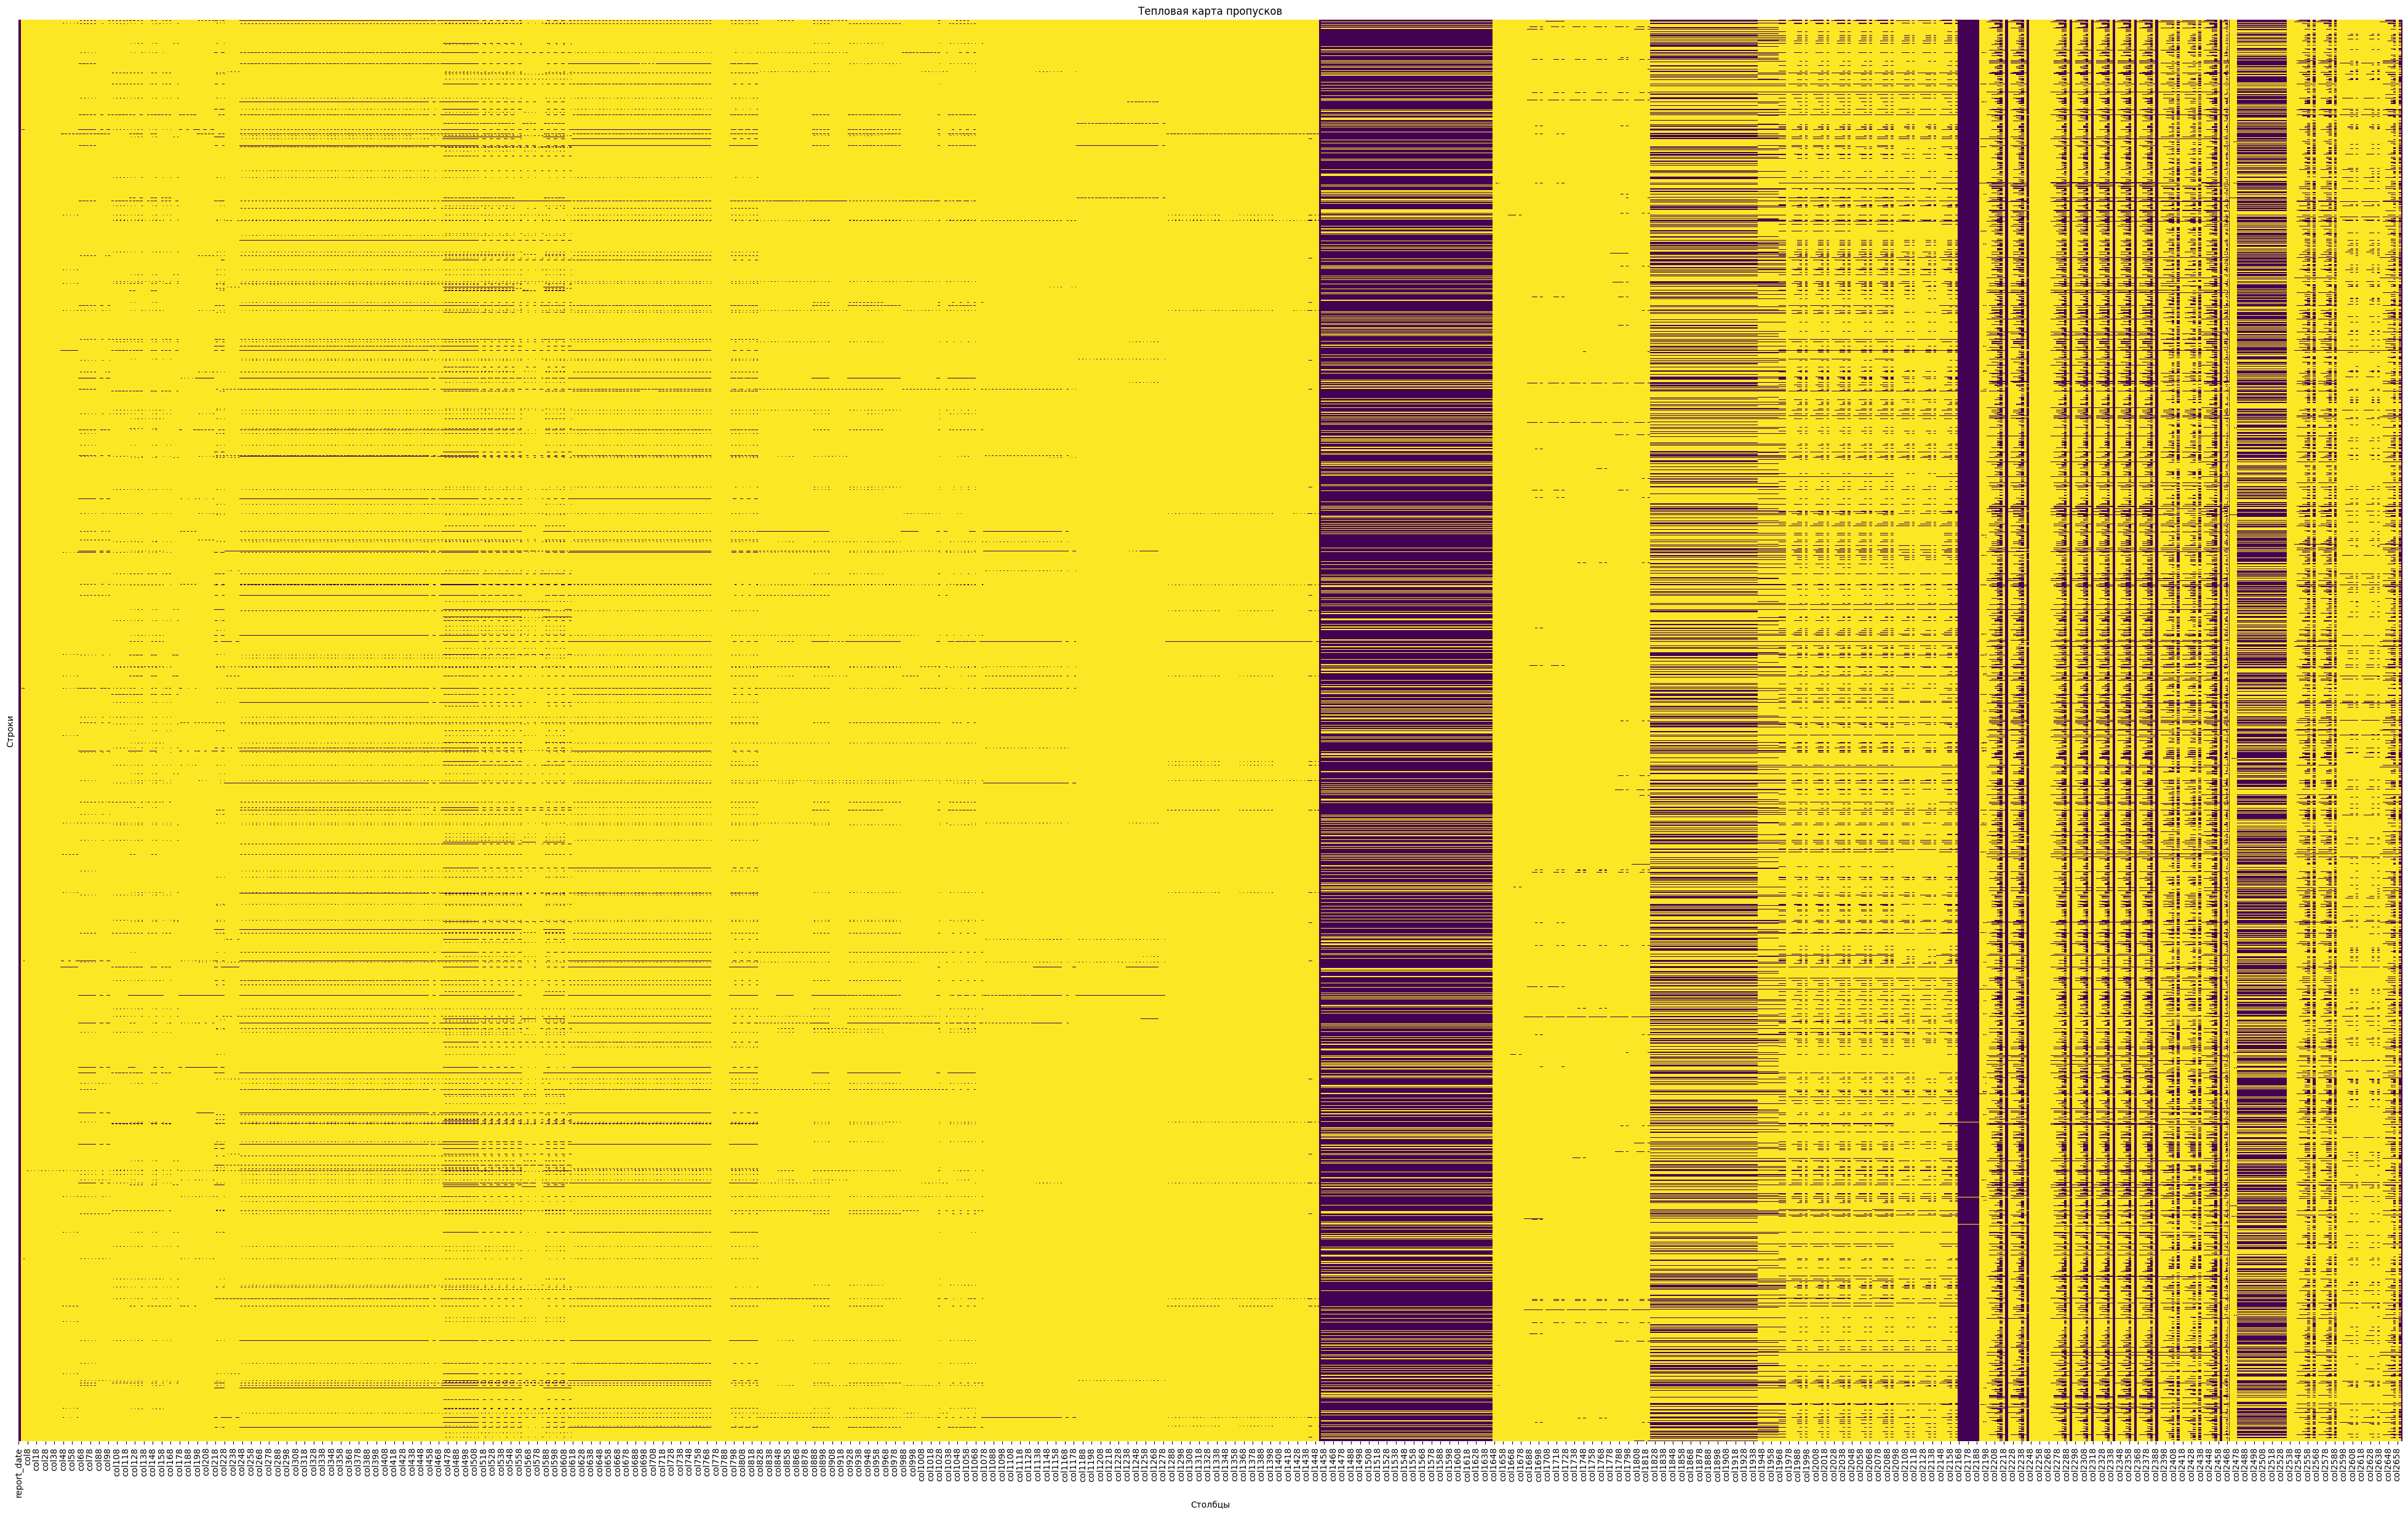

In [3]:
missing_matrix = df.isnull()

# Строим тепловую карту
plt.figure(figsize=(50, 30))  # Устанавливаем размер фигуры
sns.heatmap(missing_matrix, cbar=False, cmap='viridis', yticklabels=False)

# Настройка графика
plt.title('Тепловая карта пропусков')
plt.xlabel('Столбцы')
plt.ylabel('Строки')

plt.show()

In [4]:
# threshold = 0.1 * len(df) #фууууууу
# df=df.dropna(axis=1, thresh=threshold)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [6]:
print(df.dtypes)

report_date     object
client_id        int64
target           int64
col1           float64
col2           float64
                ...   
col2659        float64
col2660        float64
col2661        float64
col2662        float64
col2663        float64
Length: 2666, dtype: object


In [7]:
print(df['col1454'].head(10))

0    00f3d719-a6ec-4960-ba01-8372eb705443
1    01febac0-b083-494e-8589-f98400074b94
2    0278175e-c0bb-4e1e-bfe5-20db6811d3e2
3    0364571d-5325-ed11-b823-005056b825cd
4    065957a6-9b2a-435a-b561-024e9e8d9ad7
5    07ca8162-5b7d-ed11-b824-005056b89b68
6    0a154951-7e02-47d2-8d3d-480d0c84c206
7    0aed31ac-cbe2-42cb-af39-8470ad01e8a4
8    0b08a6bb-42f5-ec11-b822-005056b8a6d9
9    0b498e8a-7c01-466d-b112-0c5785574f45
Name: col1454, dtype: object


In [8]:
df.head(10)

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,NaN,NaN,NaN,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [9]:
df['report_date'] = pd.to_datetime(df['report_date'])

In [10]:
def fill_missing_with_old(group):
    # Сортируем по дате
    group = group.sort_values(by='report_date')
    # Заполняем пропуски из предыдущих строк
    group = group.ffill()
    return group
df = df.groupby('client_id').apply(fill_missing_with_old).reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_25040\130218417.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group = group.ffill()
C:\Users\user\AppData\Local\Temp\ipykernel_25040\130218417.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('client_id').apply(fill_missing_with_old).reset_index(drop=True)


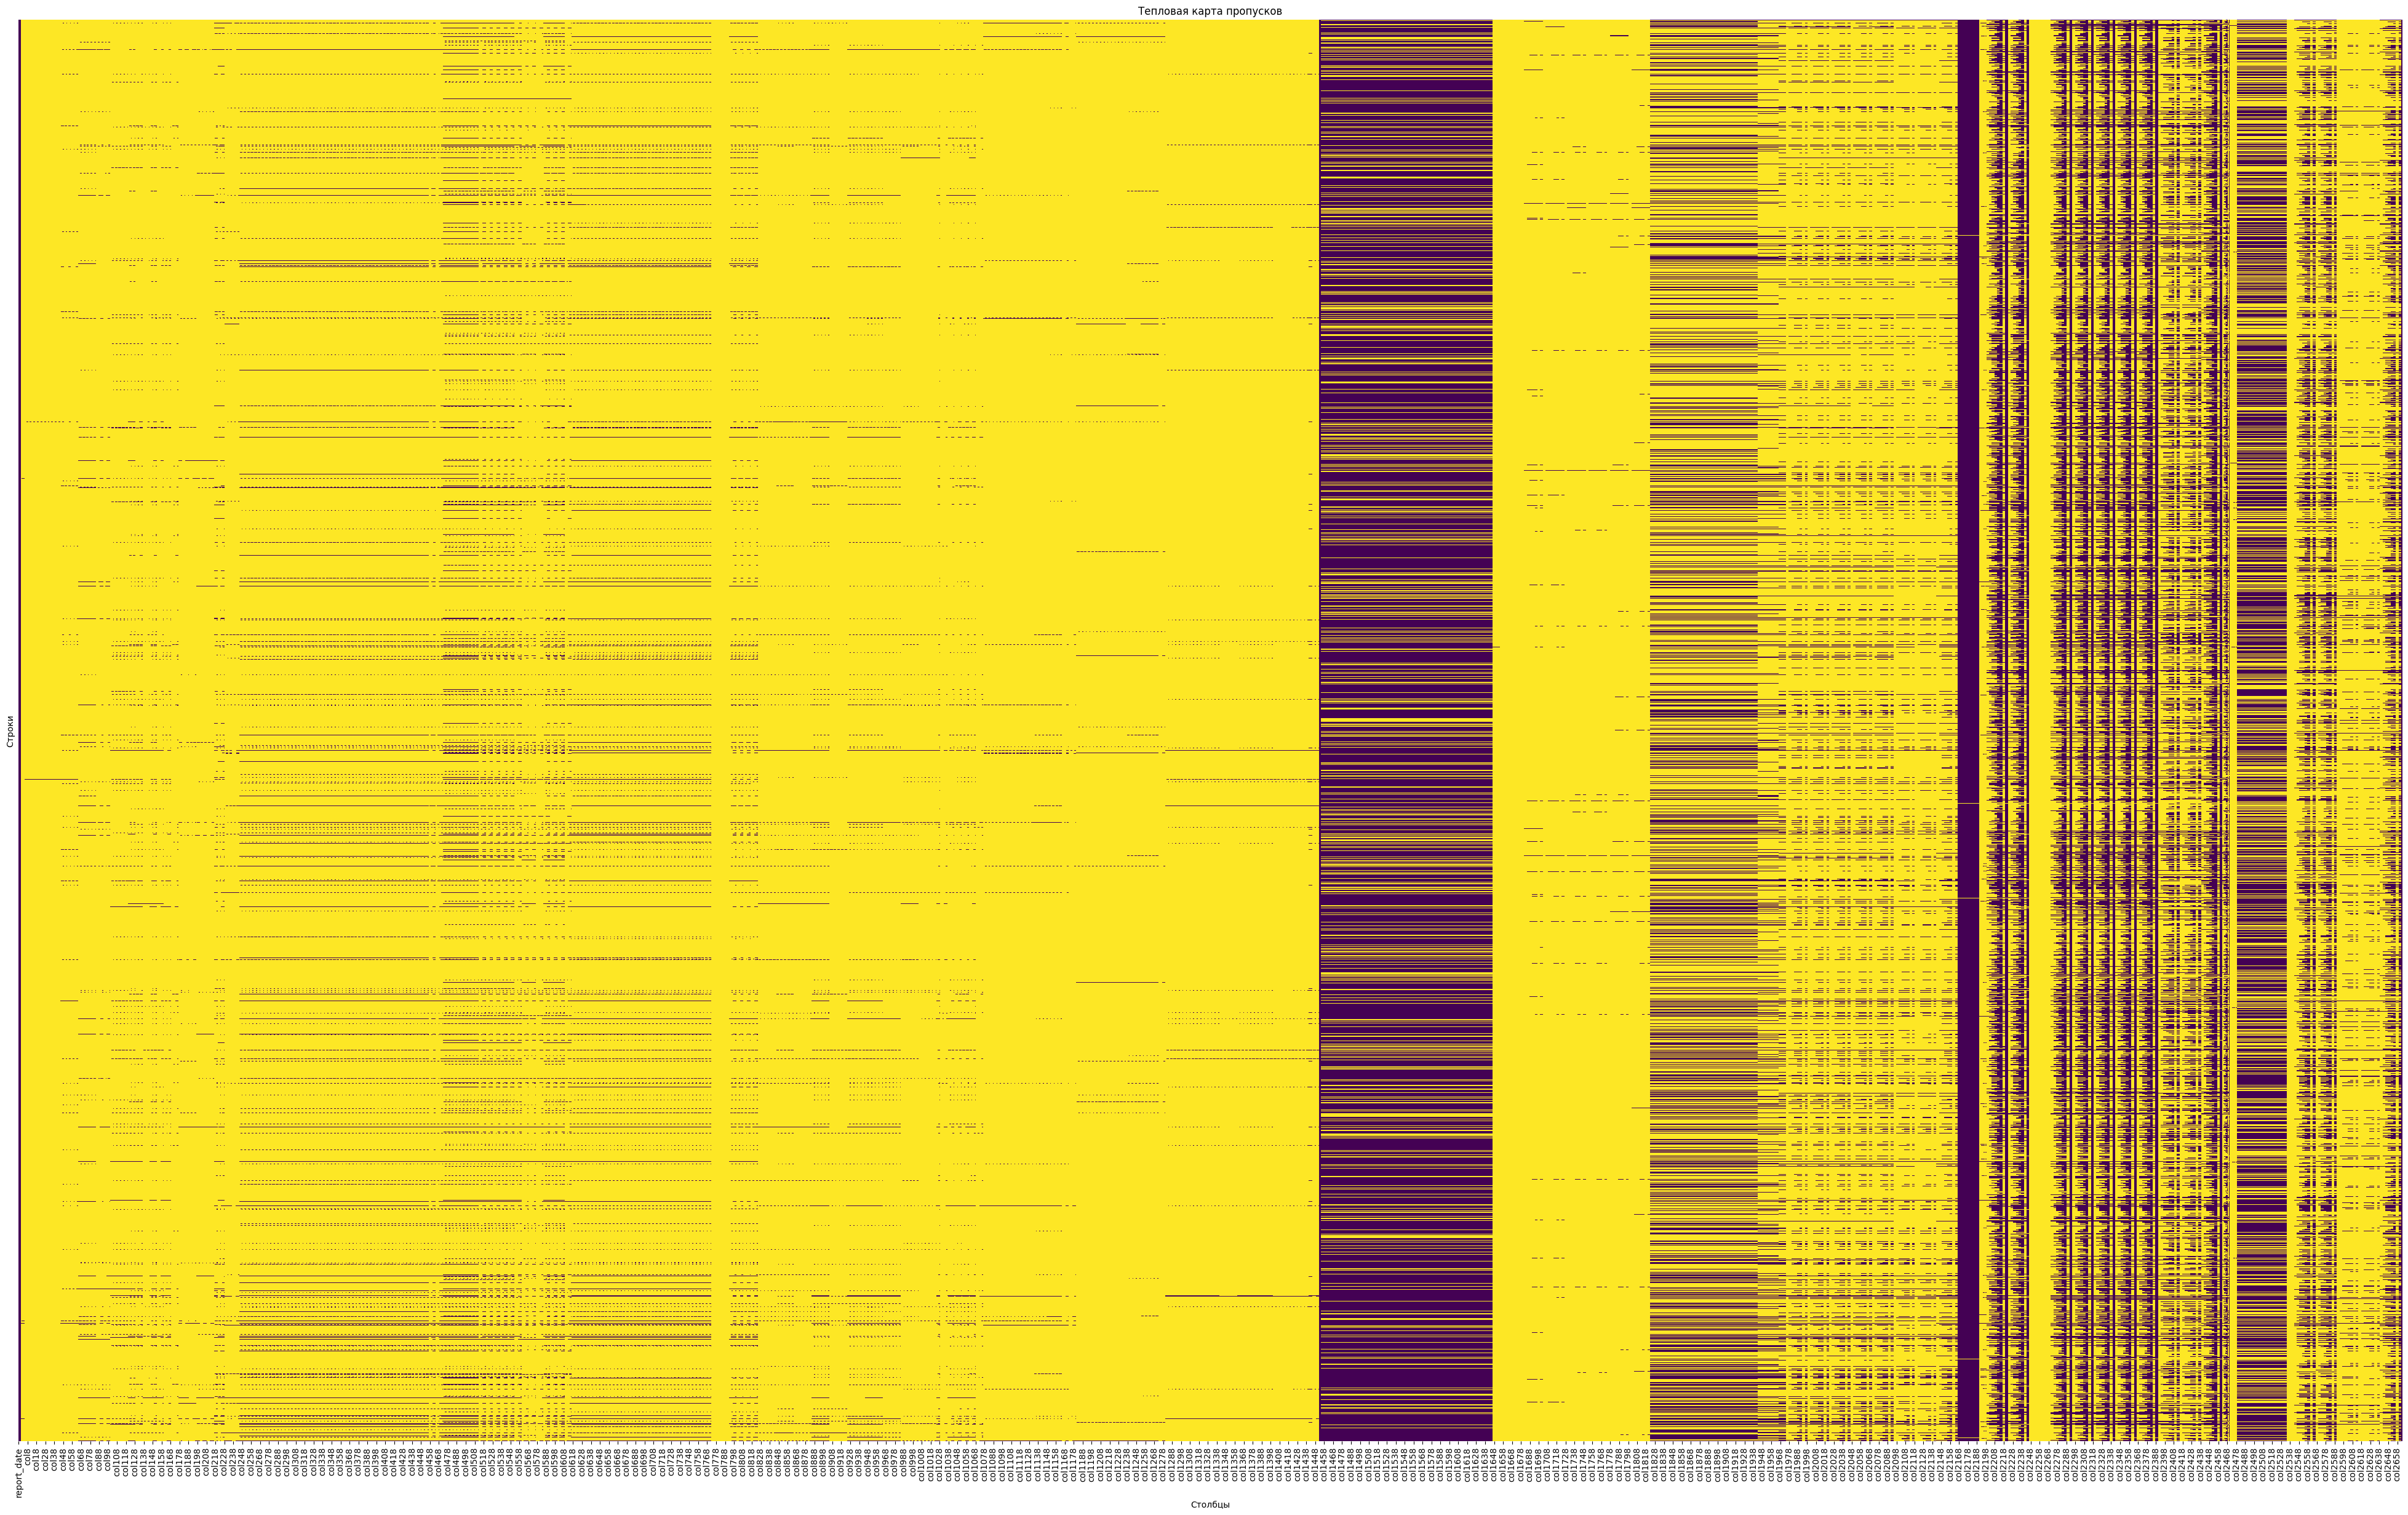

In [11]:
missing_matrix = df.isnull()

plt.figure(figsize=(50, 30))
sns.heatmap(missing_matrix, cbar=False, cmap='viridis', yticklabels=False)

# Настройка графика
plt.title('Тепловая карта пропусков')
plt.xlabel('Столбцы')
plt.ylabel('Строки')

plt.show()

In [12]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

report_date     0.000000
client_id       0.000000
target          0.000000
col1           99.972330
col2           99.930825
                 ...    
col2659        89.222468
col2660        44.410625
col2661        44.410625
col2662        44.410625
col2663         0.000000
Length: 2666, dtype: float64


In [13]:
object_columns = df.select_dtypes(include=['object'])
num_object_columns = len(object_columns.columns)

print(f"Количество колонок с типом object: {num_object_columns}")


Количество колонок с типом object: 346


In [14]:
df = df.loc[:, ~df.T.duplicated()] #дубликаты колонок пока-пока

In [15]:
df.shape


(14456, 2207)

In [16]:
df.dtypes

report_date    datetime64[ns]
client_id               int64
target                  int64
col1                  float64
col2                  float64
                    ...      
col2659               float64
col2660               float64
col2661               float64
col2662               float64
col2663               float64
Length: 2207, dtype: object

In [17]:
numeric_columns = df.select_dtypes(include=['number'])  # Выбираем числовые колонки
other_columns = df.select_dtypes(exclude=['number'])  # Выбираем все остальные колонки

# Создаём два отдельных датафрейма
df_numeric = numeric_columns.copy()  # Датафрейм с числовыми колонками
df_other = other_columns.copy()  # Датафрейм с остальными колонками

In [18]:
df_numeric.head(10)

,client_id,target,col1,col2,col3,col4,col5,col7,col8,col25,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
5,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
6,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
7,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
8,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
9,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261


In [19]:
df_other.head(10)

,report_date,col49,col50,col51,col52,col54,col55,col56,col57,col58,...,col1651,col1652,col2191,col2192,col2193,col2194,col2195,col2196,col2197,col2198
0,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(df_other)

      report_date col49 col50 col51 col52 col54 col55 col56 col57 col58  ...  \
0      2021-10-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1      2021-12-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2      2022-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3      2022-11-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4      2022-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
14451  2022-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
14452  2022-12-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
14453  2023-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
14454  2023-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
14455  2022-10-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

      col1651 col1652 col2191 col2192 c